In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision = 4)
import os
import pickle 
import pandas as pd
from datetime import date
from datetime import datetime

import sys
sys.path.append('./../')


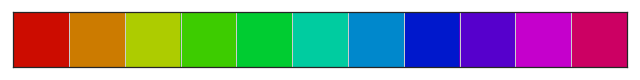

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

current_palette = sns.color_palette(sns.hls_palette(10+1, l=.4, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [3]:
#saved_pickle_path = './result_pickle/'
saved_pickle_path = './result_pickle/'
format_name = '.pickle'


In [4]:
def get_resultpickle(saved_filename):
    with open(saved_pickle_path + saved_filename + format_name, 'rb') as f:
        result_pickle = pickle.load(f) # 단 한줄씩 읽어옴    
    return result_pickle

def read_resultpikcle(result_pickle):
    print('#'*100)
    print('Exp_setting')
    print(result_pickle['Exp_setting'])
    if 'model_name' in result_pickle['Exp_setting'].keys():
        print('model_name : ' + result_pickle['Exp_setting']['model_name'])
    if 'kernel_type' in result_pickle['Exp_setting'].keys():
        print('kernel_type : ' + result_pickle['Exp_setting']['kernel_type'])    
    if 'semi_option' in result_pickle['Exp_setting'].keys():
        print('semisupervised_option : %s'%(result_pickle['Exp_setting']['semi_option']))   
    if 'lambda'in result_pickle['Exp_setting'].keys():
        print('alpha : %s' %(result_pickle['Exp_setting']['lambda']))   

    print('test rmse')
    print(np.asarray(result_pickle['test_rmse'][result_pickle['Exp_setting']['model_name']]))
    print('')
    return 

In [8]:
saved_filename = 'data_CO2_Q7_lrhyp0.01_totalsamplept35_numbatch1_optimizerAdam_optiter5000_kloptionTrue_repetitiveexp1_randomseedstart1000'


#saved_filename = 'data_airline_Q5_lrhyp0.005_totalsamplept40_numbatch1_optimizerAdam_optiter3000_kloptionTrue_repetitiveexp1_randomseedstart1000'

In [9]:
import os.path
from os import path
save_figure_path  = './result_figure/exp1/'
os.makedirs(save_figure_path) if path.isdir(save_figure_path) is False else 1


1

In [10]:
#save_figname = 'data_SM_Q2' + '_Recovery'
#save_figname = 'CO2' + '_Recovery'
save_figname = 'AIRLINE' + '_Recovery'

In [11]:
result_pickle = get_resultpickle(saved_filename)
result_pickle.keys()

dict_keys(['loss', 'Exp_setting', 'Data_setting', 'mnll', 'best_rmse', 'pred_train_var', 'rmse', 'best_loss', 'error_history', 'pred_test_var', 'best_mnll', 'pred_test_mu', 'param_history', 'pred_train_mu'])

In [12]:
result_pickle['Exp_setting']

{'Num_Q': 7, 'hypparam': {'length_scale': 0.5, 'mean': array([[0.0853],
         [0.005 ],
         [0.165 ],
         [0.015 ],
         [0.08  ],
         [0.025 ],
         [0.01  ]]), 'mean_prior': array([[0.2764],
         [0.4807],
         [0.0379],
         [0.1389],
         [0.4766],
         [0.0115],
         [0.1311]]), 'noise_variance': 1.0, 'std': array([[0.0015],
         [0.001 ],
         [0.001 ],
         [0.001 ],
         [0.001 ],
         [0.001 ],
         [0.001 ]]), 'std_prior': array([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]), 'weight': array([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]])}, 'init_sample_num': 100, 'input_dim': 1, 'iter': 5000, 'kl_option': True, 'lr_hyp': 0.01, 'noise_err': 0.6496812057463262, 'num_batch': 1, 'num_rep': 1, 'num_sample_pt': 5, 'optimizer': 'Adam', 'random_seed': 1000, 'tau0': 1000, 'weight_rate': 0.05}

In [13]:
import numpy as np

In [14]:
x_train = result_pickle['Data_setting']['x_train']
y_train = result_pickle['Data_setting']['y_train']
x_test = result_pickle['Data_setting']['x_test']
y_test = result_pickle['Data_setting']['y_test']
# x_full = result_pickle['Data_setting']['x_full']
# y_full = result_pickle['Data_setting']['y_full']

x_full = np.vstack([x_train,x_test])
y_full = np.vstack([y_train,y_test])

#

In [15]:
x_train.shape,x_test.shape

((200, 1), (301, 1))

In [16]:
result_pickle['Exp_setting']

{'Num_Q': 7, 'hypparam': {'length_scale': 0.5, 'mean': array([[0.0853],
         [0.005 ],
         [0.165 ],
         [0.015 ],
         [0.08  ],
         [0.025 ],
         [0.01  ]]), 'mean_prior': array([[0.2764],
         [0.4807],
         [0.0379],
         [0.1389],
         [0.4766],
         [0.0115],
         [0.1311]]), 'noise_variance': 1.0, 'std': array([[0.0015],
         [0.001 ],
         [0.001 ],
         [0.001 ],
         [0.001 ],
         [0.001 ],
         [0.001 ]]), 'std_prior': array([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]), 'weight': array([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]])}, 'init_sample_num': 100, 'input_dim': 1, 'iter': 5000, 'kl_option': True, 'lr_hyp': 0.01, 'noise_err': 0.6496812057463262, 'num_batch': 1, 'num_rep': 1, 'num_sample_pt': 5, 'optimizer': 'Adam', 'random_seed': 1000, 'tau0': 1000, 'weight_rate': 0.05}

In [17]:
from collections import OrderedDict

def get_static(result_pickle,metric = 'loss'):    #metic = 
    loss_mean = OrderedDict()
    loss_std = OrderedDict()
    for ith_model in result_pickle[metric]:
        loss_mean[ith_model] = np.asarray(result_pickle[metric][ith_model]).mean(axis = 0)
        loss_std[ith_model] = np.asarray(result_pickle[metric][ith_model]).std(axis = 0)
    return loss_mean,loss_std

In [18]:
loss_mean,loss_std = get_static(result_pickle,metric = 'loss')
rmse_mean,rmse_std = get_static(result_pickle,metric = 'rmse')
mnll_mean,mnll_std = get_static(result_pickle,metric = 'mnll')
#get_static(result_pickle,metric = 'pred_mu')


In [19]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

#figsiz = (6,4) 
figsiz = (7,5) 
#figsiz = (10,6) 
labelsiz = 18
fontsiz = 20
interval = 0.2

In [20]:
#target_model_list = ['weight_reg','weight_reg_nat']
#target_model_list = ['gpsm','equal_reg','equal_reg_nat','weight_reg','weight_reg_nat']
target_model_list = ['equal_reg','equal_reg_nat','weight_reg','weight_reg_nat']
#target_model_list = ['equal_reg','weight_reg']

#target_model_list = ['equal_reg','equal_reg_nat']

color_dict = {'gpsm': 0 ,'equal_reg' : 2,'equal_reg_nat' : 10,'weight_reg' : 8,'weight_reg_nat' : 4}
#color_dict = {'gpsm': 0 ,'equal_reg' : 7, 'gprbf' :4,'weight_reg' : 5}
num_tick = 100
#target_model_list = ['gpsm']

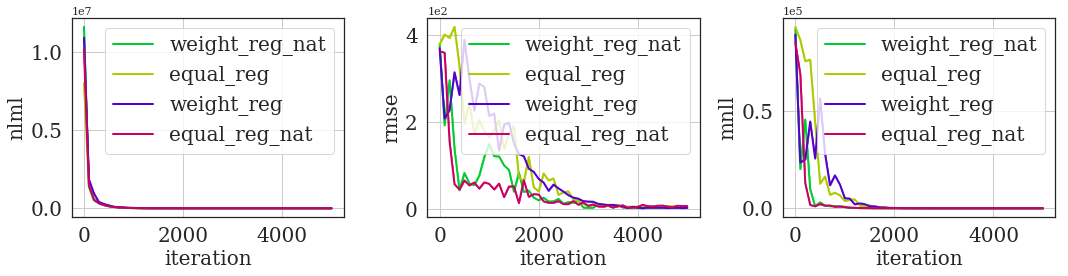

In [21]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
#for ith_model,ith_color in zip(loss_mean,color_list):
for ith_model in loss_mean:
    iteration = np.arange(len(rmse_mean[ith_model]))        
    if ith_model in target_model_list :    
        plt.plot(iteration[::num_tick], loss_mean[ith_model][::num_tick] , label = ith_model, color = current_palette[color_dict[ith_model]] , linewidth = 2)
        plt.fill_between( iteration[::num_tick],
                          loss_mean[ith_model][::num_tick] - loss_std[ith_model][::num_tick],
                          loss_mean[ith_model][::num_tick] + loss_std[ith_model][::num_tick],
                          alpha = 0.5, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]])

    
plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('nlml',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
#plt.xlim([0,1000])
plt.tick_params(axis='both', which='major', labelsize= fontsiz)
plt.legend(fontsize = fontsiz)
plt.tight_layout()
#plt.show()


plt.subplot(1,3,2)
for ith_model in rmse_mean:    
    if ith_model in target_model_list :        
        plt.plot(iteration[::num_tick], rmse_mean[ith_model][::num_tick] , label = ith_model, color = current_palette[color_dict[ith_model]] , linewidth = 2)
        plt.fill_between( iteration[::num_tick],
                          rmse_mean[ith_model][::num_tick] - rmse_std[ith_model][::num_tick],
                          rmse_mean[ith_model][::num_tick] + rmse_std[ith_model][::num_tick],
                          alpha = 0.5, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]])

    
plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('rmse',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
plt.tick_params(axis='both', which='major', labelsize= fontsiz)
plt.legend(fontsize = fontsiz)
plt.tight_layout()
#plt.show()


plt.subplot(1,3,3)
for ith_model in  mnll_mean:
    if ith_model in target_model_list :    
        plt.plot(iteration[::num_tick], mnll_mean[ith_model][::num_tick] , label = ith_model, color = current_palette[color_dict[ith_model]] , linewidth = 2)
        plt.fill_between( iteration[::num_tick],
                          mnll_mean[ith_model][::num_tick] - mnll_std[ith_model][::num_tick],
                          mnll_mean[ith_model][::num_tick] + mnll_std[ith_model][::num_tick],
                          alpha = 0.5, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]])
    

plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('mnll',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
plt.tick_params(axis='both', which='major', labelsize= fontsiz)
plt.legend(fontsize = fontsiz)
plt.tight_layout()
plt.show()





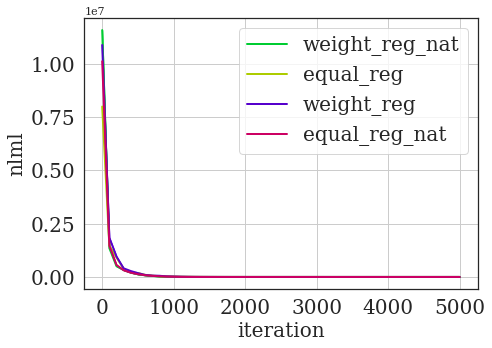

In [22]:
plt.figure(figsize = figsiz)
#for ith_model,ith_color in zip(loss_mean,color_list):
for ith_model in loss_mean:
    iteration = np.arange(len(rmse_mean[ith_model]))        
    if ith_model in target_model_list :    
        plt.plot(iteration[::num_tick], loss_mean[ith_model][::num_tick] , label = ith_model, color = current_palette[color_dict[ith_model]] , linewidth = 2)
        plt.fill_between( iteration[::num_tick],
                          loss_mean[ith_model][::num_tick] - loss_std[ith_model][::num_tick],
                          loss_mean[ith_model][::num_tick] + loss_std[ith_model][::num_tick],
                          alpha = 0.5, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]])

    
plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('nlml',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
#plt.xlim([0,1000])
plt.tick_params(axis='both', which='major', labelsize= fontsiz)
plt.legend(fontsize = fontsiz)
plt.tight_layout()
plt.show()



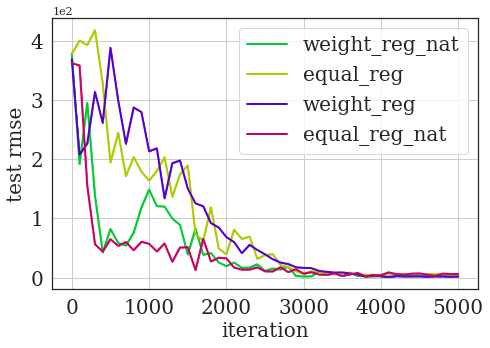

In [25]:
plt.figure(figsize = figsiz)
#for ith_model,ith_color in zip(rmse_mean,color_list):
for ith_model in rmse_mean:    
    if ith_model in target_model_list :        
        plt.plot(iteration[::num_tick], rmse_mean[ith_model][::num_tick] , label = ith_model, color = current_palette[color_dict[ith_model]] , linewidth = 2)
        plt.fill_between( iteration[::num_tick],
                          rmse_mean[ith_model][::num_tick] - rmse_std[ith_model][::num_tick],
                          rmse_mean[ith_model][::num_tick] + rmse_std[ith_model][::num_tick],
                          alpha = 0.5, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]])

    
plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('test rmse',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
plt.tick_params(axis='both', which='major', labelsize= fontsiz)
plt.legend(fontsize = fontsiz)
plt.tight_layout()
plt.show()





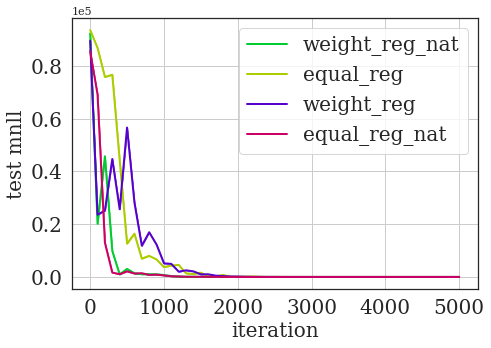

In [26]:
plt.figure(figsize = figsiz)
#for ith_model,ith_color in zip(mnll_mean,color_list):
for ith_model in  mnll_mean:
    if ith_model in target_model_list :    
        plt.plot(iteration[::num_tick], mnll_mean[ith_model][::num_tick] , label = ith_model, color = current_palette[color_dict[ith_model]] , linewidth = 2)
        plt.fill_between( iteration[::num_tick],
                          mnll_mean[ith_model][::num_tick] - mnll_std[ith_model][::num_tick],
                          mnll_mean[ith_model][::num_tick] + mnll_std[ith_model][::num_tick],
                          alpha = 0.5, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]])
    

plt.tick_params(labelsize=labelsiz) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('test mnll',fontsize = fontsiz)
plt.xlabel('iteration',fontsize = fontsiz)
plt.tick_params(axis='both', which='major', labelsize= fontsiz)
plt.legend(fontsize = fontsiz)
plt.tight_layout()
plt.show()



In [27]:
from scipy import signal
from scipy import  stats

#def get_symmetric_gaussain_density(weight_param,mu_param,std_param,x):
def get_symmetric_gaussain_density(result_pickle = None,weight_param = None,mu_param = None,std_param = None,ith_model = None,x = None):
    if result_pickle is not None:
        weight_param = np.asarray(result_pickle['param_history'][ith_model]['weight']).squeeze()[-1]
        mu_param = np.asarray(result_pickle['param_history'][ith_model]['mu']).squeeze()[-1]
        std_param = np.asarray(result_pickle['param_history'][ith_model]['std']).squeeze()[-1]    
    print(ith_model)
    print(weight_param)
    print(mu_param)
    print(std_param)

    #print( 'weight param : {0:.4f}'.format(weight_param))
    
    a = []
    for ith_weight,ith_mu,ith_std in zip(weight_param,mu_param,std_param):
        print(ith_weight,ith_mu,ith_std)
        a.append(.5*ith_weight* ( stats.norm.pdf(x, ith_mu,ith_std**2) + stats.norm.pdf(x, -ith_mu ,ith_std**2) ) )
        #print('')
    a =  np.asarray(a).sum(axis = 0)
    #return a
    #return np.asarray(a)
    #print(a)
    print('')
    
    #return a/a.sum()
    return a

In [28]:
#target_model_list = ['weight_reg','equal_reg','weight_reg_nat', 'rff','gpvfe']
target_model_list = ['equal_reg_nat','weight_reg','equal_reg','weight_reg_nat', 'rff','gpvfe','vssgp']
#target_model_list = ['equal_reg_nat','weight_reg','equal_reg','weight_reg_nat']
#target_model_list = ['equal_reg_nat','equal_reg', 'rff','gpvfe']

#target_model_dict = {'equal_reg': 'EqualS','equal_reg_nat':'EqualS Nat', 'weight_reg':'WeightS ','weight_reg_nat': 'WeightS Nat','gpsm': 'gpsm','rff':'rff','gpvfe':'gpvfe'}

target_model_dict = {'equal_reg': 'SVSS','equal_reg_nat':'SVSS Ng', 'weight_reg':'SVSS Ws ','weight_reg_nat': 'SVSS WsNg','gpsm': 'gpsm','rff':'SS','gpvfe':'VFE (SM)','vssgp':'VSS'}

target_model_dict = {'equal_reg': 'SVSS','equal_reg_nat':'SVSS Ng', 'weight_reg':'SVSS Ws ','weight_reg_nat': 'SVSS WsNg'
                     ,'gpsm': 'gpsm','rff':'SS','gpvfe':'VFE (SM)','gpvferbf':'VFE (RBF)'
                     ,'gpytorch_batch_ARD':'batchARD', 'gpytorch_batch_SM':'batchSM','vssgp':'VSS'}


#color_dict = {'gpsm': 0 ,'equal_reg' : 1,'equal_reg_nat' : 10,'weight_reg' : 4,'weight_reg_nat' : 7 , 'gpsm_dkl' : 10}
#color_dict = {'equal_reg' : 4 , 'equal_reg_nat' : 5,'weight_reg' : 7,'weight_reg_nat' : 8 , 'gpvfe' : 0 , 'rff' : 1 , 'vssgp' : 2, 'gpvferbf':3}
color_dict = {'equal_reg' : 4 , 'equal_reg_nat' : 5,'weight_reg' : 6,'weight_reg_nat' : 8 , 'gpvfe' : 0 , 'rff' : 1 , 'vssgp' : 2, 'gpvferbf':3}


In [30]:
figsiz = (8,5) 
labelsiz = 15
fontsiz = 20
interval = 0.2

In [31]:
ith_exp_index = 0

In [32]:
color_dict

{'equal_reg': 4,
 'equal_reg_nat': 5,
 'gpvfe': 0,
 'gpvferbf': 3,
 'rff': 1,
 'vssgp': 2,
 'weight_reg': 6,
 'weight_reg_nat': 8}

In [33]:
result_pickle['pred_test_mu'].keys()

dict_keys(['weight_reg_nat', 'rff', 'equal_reg', 'weight_reg', 'equal_reg_nat'])

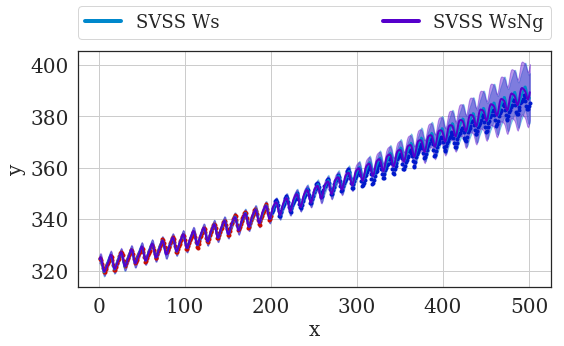

'./result_figure/exp1/AIRLINE_Recovery'

In [34]:
### for iith,(ith_model,ith_color) in enumerate(zip(result_pickle['pred_mu'],color_list)):

#plt.figure(figsize = figsiz)
plt.figure(figsize = (8,5))


# plt.plot(x_train, y_train,color = current_palette[0] ,label = 'train' , linewidth = 3)
# plt.plot(x_test, y_test,color = current_palette[7] ,label = 'test' , linewidth = 3)

# plt.plot(x_train, y_train, '.',color = current_palette[0] ,label = 'train' , linewidth = 3)
# plt.plot(x_test, y_test ,'.', color = current_palette[7] ,label = 'test' , linewidth = 3)

plt.plot(x_train, y_train, '.',color = current_palette[0]  , linewidth = 3)
plt.plot(x_test, y_test ,'.', color = current_palette[7] , linewidth = 3)

# ith_model = 'gprbf'
# plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'RBF' , color = current_palette[color_dict[ith_model]] , linewidth = 1.5)
# plt.fill_between( x_full.squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]]  )


# ith_model = 'gpsm'
# plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'SM' , color = current_palette[color_dict[ith_model]] , linewidth = 1.5)
# plt.fill_between( x_full.squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]]  )

# ith_model = 'rff'
# plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'SS' , color = current_palette[color_dict[ith_model]] , linewidth = 1.5)
# plt.fill_between( x_full.squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]]  )


# ith_model = 'equal_reg'
# plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'SVSS' , color = current_palette[color_dict[ith_model]] , linewidth = 2)
# plt.fill_between( x_full.squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]] )


# ith_model = 'equal_reg_nat'
# plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'SVSS Ng' , color = current_palette[color_dict[ith_model]] , linewidth = 1.5)
# plt.fill_between( x_full.squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
#                   alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]] )


ith_model = 'weight_reg'
plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'SVSS Ws' , color = current_palette[color_dict[ith_model]] , linewidth = 2)
plt.fill_between( x_full.squeeze(),
                  (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
                  (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
                  alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]] )


ith_model = 'weight_reg_nat'
plt.plot(x_full,result_pickle['pred_test_mu'][ith_model][ith_exp_index] , label = 'SVSS WsNg' , color = current_palette[color_dict[ith_model]] , linewidth = 2)
plt.fill_between( x_full.squeeze(),
                  (result_pickle['pred_test_mu'][ith_model][ith_exp_index] - 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
                  (result_pickle['pred_test_mu'][ith_model][ith_exp_index] + 2*np.sqrt(result_pickle['pred_test_var'][ith_model][ith_exp_index])).squeeze(),
                  alpha = 0.4, edgecolor = current_palette[color_dict[ith_model]], facecolor = current_palette[color_dict[ith_model]] )





plt.tick_params(labelsize=labelsiz) 
#plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.ylabel('y',fontsize = 20)
plt.xlabel('x',fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize= fontsiz)

leg = plt.legend(bbox_to_anchor=(0,1.05,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4,fontsize = 18)
for i in leg.legendHandles:
    i.set_linewidth(4)        

plt.tight_layout()

plt.savefig(save_figure_path + save_figname   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


save_figure_path + save_figname 


In [35]:
#w = np.arange(0,.5,1e-8)
w = np.arange(0,.5,1e-6)

#s_w = get_symmetric_gaussain_density(weight_param[-1],mu_param[-1],std_param[-1] ,w)

#s_w_equal = get_symmetric_gaussain_density(result_pickle = result_pickle,ith_model = 'equal_reg' ,x = w)
#s_w_equal_nat = get_symmetric_gaussain_density(result_pickle = result_pickle,ith_model = 'equal_reg_nat' ,x = w)

s_w_weight = get_symmetric_gaussain_density(result_pickle = result_pickle,ith_model = 'weight_reg' ,x = w)
s_w_weight_nat = get_symmetric_gaussain_density(result_pickle = result_pickle,ith_model = 'weight_reg_nat' ,x = w)


#s_w_sm = get_symmetric_gaussain_density(result_pickle = result_pickle,ith_model = 'gpsm' ,x = w)
#s_w_true = get_symmetric_gaussain_density(weight_param = [1,0.5],mu_param = [0.2,0.9],std_param = [.05,.05],x = w)


weight_reg
[1.3067e+02 4.5150e+06 8.5523e+00 2.8507e-01 1.1011e-04 2.9205e-01
 4.0503e-01]
[8.3241e-02 6.5543e-06 1.6635e-01 3.0612e-03 4.8101e-01 1.4986e-02
 2.0544e-03]
[8.0476e-05 1.4321e-04 3.2865e-04 3.8362e-02 1.0022e+00 2.5208e-02
 2.2788e-02]
130.66500382075688 0.08324139733620323 8.047613849359071e-05
4515043.018484028 6.554269597441928e-06 0.0001432113571498805
8.552272560868428 0.16634509918003054 0.0003286491962164773
0.2850709510303661 0.003061214780010848 0.038361649136309565
0.0001101091175003879 0.48101395391822505 1.0022474322990655
0.29204809750703453 0.014985736518229284 0.025208158240875026
0.40503157343232987 0.002054361561177356 0.022787877240874783

weight_reg_nat
[1.3142e+02 2.5585e-03 7.7223e+00 8.9204e-05 4.9674e+06 9.0013e-02
 9.6568e-03]
[8.3311e-02 7.3575e-05 1.6699e-01 1.3879e-01 1.3362e-06 3.8907e-05
 3.1699e-05]
[1.7043e-04 1.0075e+00 5.9341e-04 1.0031e+00 1.3214e-04 2.0567e-01
 9.7442e-01]
131.4162924085496 0.08331117674158595 0.00017042532466427605
0.0

In [36]:
log_option = True

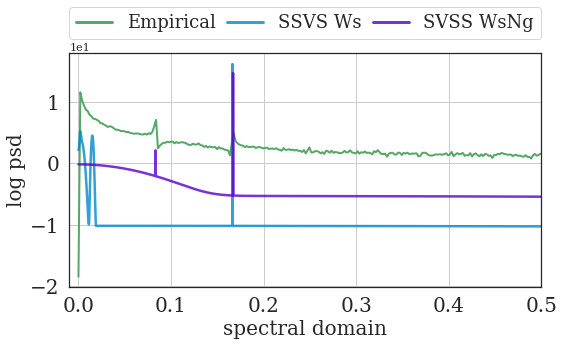

'./result_figure/exp1/AIRLINE_Recovery2'

In [37]:
from scipy import signal
import matplotlib.pyplot as plt
fs = int(1/(x_full[1]-x_full[0]))
f, Pxx_den = signal.periodogram(y_full.squeeze(), fs)

init0 = 1e-8

plt.figure(figsize = (8,5))
#plt.plot(w,s_w_sm,'b')
#plt.plot(w,s_w_equal,'r')

if log_option:
    plt.plot(f,np.log(Pxx_den + init0), label = 'Empirical', color = 'g' , linewidth = 2)
else:
    plt.plot(f,Pxx_den + init0, label = 'Empirical', color = 'g' , linewidth = 2)

    #plt.plot(f, np.log(np.sqrt(Pxx_den)),'g')

# ith_model = 'true'
# plt.plot(w,np.log(s_w_true + init0), label = 'true', color = 'k' , linewidth = 2 )




# ith_model = 'equal_reg'
# if log_option:
#     plt.plot(w,np.log(s_w_equal + init0), label = 'SVSS', color = current_palette[color_dict[ith_model]] , linewidth = 2.5,alpha = 0.8)
# else:
#     plt.plot(w,s_w_equal + init0, label = 'SVSS', color = current_palette[color_dict[ith_model]] , linewidth = 2.5,alpha = 0.8)
    

    
ith_model = 'weight_reg'
if log_option:
    plt.plot(w,np.log(s_w_weight +init0), label = 'SSVS Ws', color = current_palette[color_dict[ith_model]] , linewidth = 2.5,alpha = 0.8)
else:
    plt.plot(w,s_w_weight +init0, label = 'SSVS Ws', color = current_palette[color_dict[ith_model]] , linewidth = 2.5,alpha = 0.8)    


    

ith_model = 'weight_reg_nat'
if log_option:
    plt.plot(w,np.log(s_w_weight_nat + init0), label = 'SVSS WsNg', color = current_palette[color_dict[ith_model]] , linewidth = 2.5,alpha = 0.8)
else:
    plt.plot(w,s_w_weight_nat + init0, label = 'SVSS WsNg', color = current_palette[color_dict[ith_model]] , linewidth = 2.5,alpha = 0.8)
    



plt.tick_params(labelsize=20) 
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# plt.ylabel('log power density',fontsize = 20)
# plt.xlabel('spectral domain',fontsize = 20)

plt.ylabel('log psd',fontsize = 20)
plt.xlabel('spectral domain',fontsize = 20)


# plt.xlim([-7.1,7.1])
# plt.ylim([-2.5,2.5])

#plt.xlim([-0.01,.3])
plt.xlim([-0.01,.5])


leg = plt.legend(bbox_to_anchor=(0,1.06,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4,fontsize = 18)
for i in leg.legendHandles:
    i.set_linewidth(3)        

plt.tight_layout()

plt.savefig(save_figure_path + save_figname + '2'   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


save_figure_path + save_figname + '2'

